# Statistics
## From "Exercises in statistics.ipynb" February 10, 2025 
### Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
es = pd.read_csv('C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\Data_and_Things_W2025_Exercises\\data\\energySoftware.csv')
es

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671
...,...,...,...,...,...,...
1436,bubblesort_ll,0.013184,0.014038,,,2.394
1437,bubblesort_ll,0.021362,0.014343,,,2.428
1438,bubblesort_ll,0.013672,0.014221,,,2.479
1439,bubblesort_ll,0.019531,0.014526,,,2.537


In [3]:
es['test'].value_counts()

test
bubblesort         361
bubblesort_func    360
bubblesort_ll2     360
bubblesort_ll      360
Name: count, dtype: int64

### 1. Plot the distribution of CPU for each test type


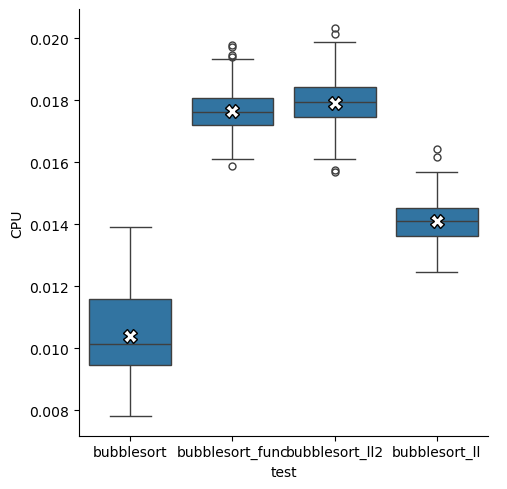

In [4]:
sns.catplot(x='test', y="CPU", data = es, kind="box", showmeans=True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

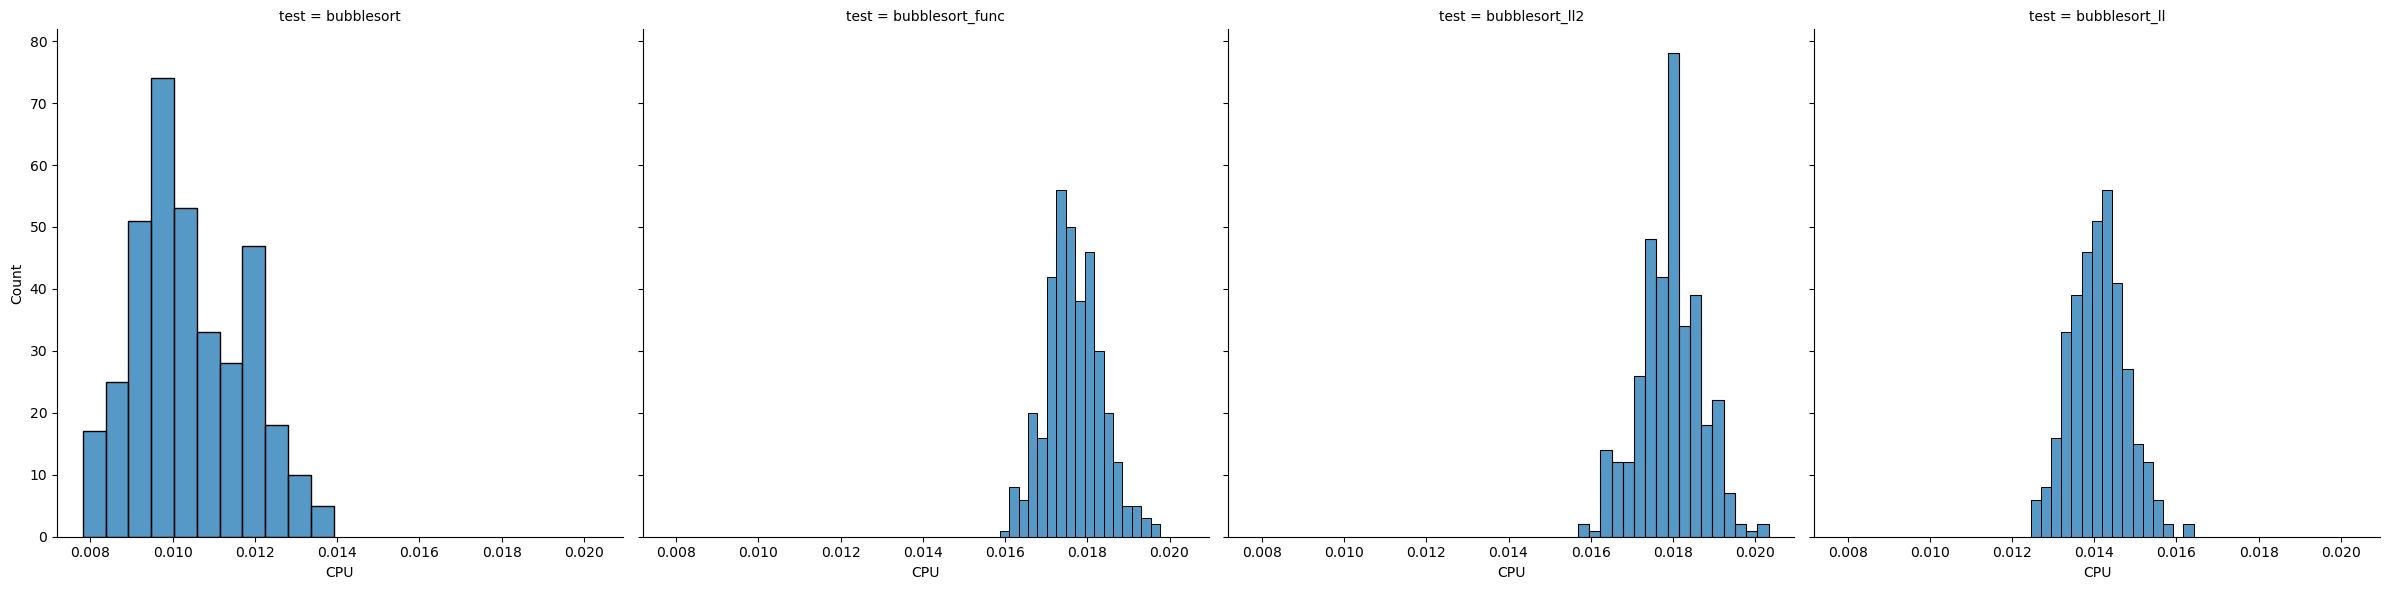

In [5]:
g = sns.FacetGrid(data=es, col="test", height= 6)
g.map(sns.histplot, 'CPU')
plt.show()
#looks very distributed

In [6]:
algo = es[es['test'].isin(['bubblesort', 'bubblesort_ll'])]

algo = algo[['test','CPU']]

res = stats.normaltest(algo['CPU']) 
res.pvalue

# stats.normaltest(es[es['test'] == 'bubblesort'])
# stats.normaltest agrees, very *very* normalized 

np.float64(1.5569272557242618e-201)

### 2.1 Justification of choice of test(s) for difference bubblesort and bublesort_II 

In [7]:
# Comparison
# Continious
# Large sample size
# Normalized distribution thus we do parametric tests
# 2 groups
# difference in groups

#thus : Student t-test



### 2.2 Actual testing

In [8]:
#null hypothesis is, There is no significant difference in CPU usage between the two algorithms.
#alternative hypothesis is that there is a difference. 
#level of significance is > 0.05
stats.ttest_ind(es[es["test"]=="bubblesort"]["CPU"], es[es["test"]=="bubblesort_ll"]["CPU"])
# pvalue is so small and under our significance level, that we can reject the null hypothesis, and say there is a statistic difference between the types 
# of algorithms 

TtestResult(statistic=np.float64(-47.4605163039462), pvalue=np.float64(9.831404686370246e-224), df=np.float64(719.0))

### 3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?


In [9]:
stats.ttest_ind(es[es["test"]=="bubblesort"]["CPU"], es[es["test"]=="bubblesort_ll2"]["CPU"])
# Since the p-value is 0.0, you can reject the null hypothesis at any logically reasonable significance level.

# There is certainty that there is a difference, however I am unsure how to decipher the effect or size of the difference

TtestResult(statistic=np.float64(-93.63515448221312), pvalue=np.float64(0.0), df=np.float64(719.0))

### 3. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
